**绘制子图**

**1. subplot()函数**

* matplotlib中创建多个子图所用到的函数为: plt.subplot(nrows, ncols, index)

* 在当前的图中，函数创建并返回一个Axes对象，其位置索引为nrows乘ncolsaxes的网格。如果nrows、ncols和index都小于10，则索引从1到nrows*ncols，按行大顺序递增。索引也可以是单数、连数、三位数。例如，subplot(2，3，3)和subplot(233)都在当前图的右上角创建了一个Axes，占据了图高的一半和图宽的三分之一，即是2x3网格的右上角区域。

* 创建子图将删除任何与它重叠的、超出共享边界的已有子图。


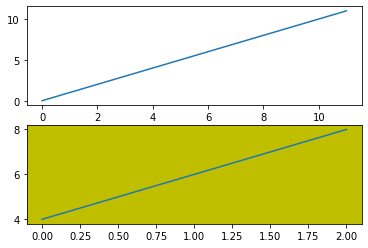

In [1]:
import matplotlib.pyplot as plt

# plot画图时，当只有一个列表或者数组的时候，这个列表会被当做Y轴，X轴由索引自动生成
# 创建第一个默认背景的子图
plt.subplot(211)
plt.plot(range(12))
# 创建第二个有着黄色背景的子图
plt.subplot(212, facecolor='y') # creates 2nd subplot with yellow background
plt.plot([4,6,8])
plt.show()

* 画布中的add_subplot()函数不会覆盖现有的图。

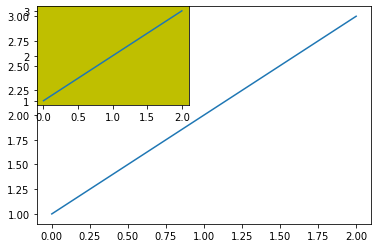

In [10]:
fig = plt.figure()

# 在这个画布中用ax添加第一个子块
ax1 = fig.add_subplot(111)
ax1.plot([1,2,3])

#在这个画布分成2x2的区域，取第一个区域进行画图
ax2 = fig.add_subplot(221, facecolor='y')
ax2.plot([1,2,3])

* 可以通过在同一图形画布中添加另一个轴对象，在同一图形中添加插入图。

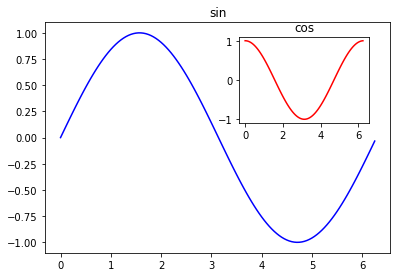

In [13]:
import numpy as np
import math

x = np.arange(0, math.pi*2, 0.05)
fig = plt.figure()
# 通过fig.add_axes给设定的axes调整位置和大小

# 主要的axes
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# 插入的axes
axes2 = fig.add_axes([0.55, 0.55, 0.3, 0.3]) # inset axes
y = np.sin(x)

# 分别在axes1区域和axes2区域作图
axes1.plot(x, y, 'b')
axes2.plot(x,np.cos(x),'r')

# 分别给axes1区域和axes2区域设置标题
axes1.set_title('sin')
axes2.set_title("cos")
plt.show()

**2. subplots()函数**

* plt.subplots(nrows, ncols)
* 该函数的两个整数参数指定了子图网格的行数和列数。该函数返回一个图形对象和一个包含等于nrows*ncols的坐标轴对象的元组。每个坐标轴对象都可以通过它的索引来访问。

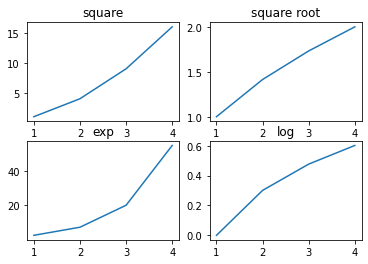

In [14]:
# 创建一个画布，并将这个画布分成2x2个的子区域
fig,a = plt.subplots(2,2)
x = np.arange(1,5)

# 在第一个axes区域画图并设置标题
a[0][0].plot(x,x*x)
a[0][0].set_title('square')

# 在第一行第二列的axes区域画图并设置标题
a[0][1].plot(x,np.sqrt(x))
a[0][1].set_title('square root')

# 在第二行第一列的axes区域画图并设置标题
a[1][0].plot(x,np.exp(x))
a[1][0].set_title('exp')

# 在第二行第二列的axes区域画图并设置标题
a[1][1].plot(x,np.log10(x))
a[1][1].set_title('log')
plt.show()

**3. subplot2grid()函数**

* 这个函数在网格的特定位置创建轴对象时提供了更多的灵活性。它还允许轴对象跨越多行或多列。
* plt.subplot2grid(shape, location, rowspan, colspan)



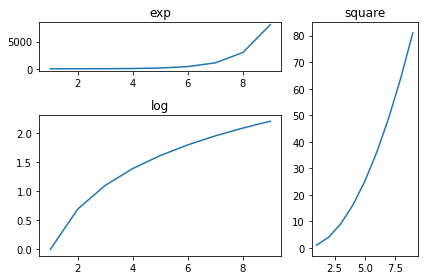

In [7]:
axes1 = plt.subplot2grid((3,3),(0,0),colspan = 2)

axes2 = plt.subplot2grid((3,3),(0,2), rowspan = 3)

axes3 = plt.subplot2grid((3,3),(1,0),rowspan = 2, colspan = 2)

x = np.arange(1,10)

axes1.plot(x, np.exp(x))
axes1.set_title('exp')

axes2.plot(x, x*x)
axes2.set_title('square')

axes3.plot(x, np.log(x))
axes3.set_title('log')
# tight_layout会自动调整子图参数，使之填充整个图像区域，减少排版出错。
plt.tight_layout()
plt.show()

* shape为3x3，画布共分成了9个网格，location为（0,0）时，代表第一个网格，为（0,2）时代表第一行第三个网格。依次类推。对于axes1来说，colspan=3的意思是这个axes区域从网格的起始点（0,0）开始，又在此基础上占据了两列。同理，对于axes2来说，rowspan=3，是在（0,2）这个起始网格点的基础上，又增加了三行。对于axes3来说，rowspan=2，colspan=2，是在（1,0）这个网格点做起始点的基础上又增加了两行两列。


**4. grid()函数**

* axes对象的grid()函数可以设置网格在图中的可见性为开启或关闭。也可以显示网格的主要/次要（或两者）刻度。此外，在grid()函数中还可以设置颜色、线型和线宽属性。

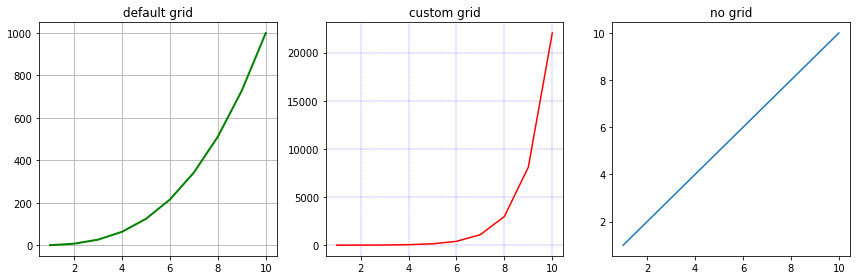

In [8]:
fig, axes = plt.subplots(1,3, figsize = (12,4))
x = np.arange(1,11)

axes[0].plot(x, x**3, 'g',lw=2)
axes[0].grid(True)   # plt.grid()为显示网格线，1=True=默认显示；0=False=不显示
axes[0].set_title('default grid')

axes[1].plot(x, np.exp(x), 'r')
axes[1].grid(color='b', ls = '-.', lw = 0.25)
axes[1].set_title('custom grid')

axes[2].plot(x,x)
axes[2].set_title('no grid')

# fig.tight_layout用于自动调整子图参数
fig.tight_layout()
plt.show()